In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import os
os.chdir('/content/drive/My Drive/Fer2013')

!ls

example_submission.csv	fer2013.bib  fer2013.csv  README  READ.txt


### **LEER DATA FER2013**

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('fer2013.csv', index_col=None)

### **TRAIN**

In [0]:
train = data.loc[data['Usage']=='Training']
pd_Train_X = train['pixels']
np_Train_X = [np.array([int(x) for x in tx.split()]) for tx in pd_Train_X]
train_X = np.array(np_Train_X)

In [0]:
train_X = train_X.reshape(-1, 48, 48)
train_Y = train['emotion']
train_X.shape

(28709, 48, 48)

## **VALIDATION**

In [0]:
validation = data.loc[data['Usage']=='PublicTest']
pd_Validation_X = validation['pixels']
np_Validation_X = [np.array([int(y) for y in ty.split()]) for ty in pd_Validation_X]
validation_X = np.array([np_Validation_X])

In [0]:
validation_X = validation_X.reshape(-1, 48, 48)
validation_Y = validation['emotion']
validation_X.shape

(3589, 48, 48)

### **TEST**

In [0]:
test = data.loc[data['Usage']=='PrivateTest']
pd_Test_X = test['pixels']
np_Test_X = [np.array([int(y) for y in ty.split()]) for ty in pd_Test_X]
test_X = np.array([np_Test_X])

In [0]:
test_X = test_X.reshape(-1, 48, 48)
test_Y = test['emotion']
test_X.shape

(3589, 48, 48)

### **CLASES**

In [0]:
classes = np.unique(train_Y)
nClasses = len(classes)
print('Total number of outputs : ', nClasses)
print('Output classes : ', classes)


Total number of outputs :  7
Output classes :  [0 1 2 3 4 5 6]


In [0]:
train_Y = train_Y.to_numpy()
validation_Y = validation_Y.to_numpy()
test_Y = test_Y.to_numpy()

Text(0.5, 1.0, 'Ground Truth : 0')

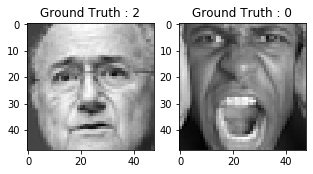

In [0]:
plt.figure(figsize=[5,5])

# Display the first image in training data
plt.subplot(121)
plt.imshow(train_X[5,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(train_Y[5]))

# Display the first image in testing data
plt.subplot(122)
plt.imshow(test_X[5,:,:], cmap='gray')
plt.title("Ground Truth : {}".format(test_Y[5]))

### **PRE-PROCCESING**

In [0]:
from keras.utils import to_categorical
train_X = train_X.reshape(-1, 48,48, 1)
validation_X = validation_X.reshape(-1, 48,48, 1)
test_X = test_X.reshape(-1, 48,48, 1)

# Image in range (0, 1)
train_X = train_X.astype('float32')
validation_X = validation_X.astype('float32')
test_X = test_X.astype('float32')
train_X = train_X / 255.
validation_X = validation_X / 255.
test_X = test_X / 255.

# Change the labels from categorical to one-hot encoding
train_Y_one_hot = to_categorical(train_Y)
validation_Y_one_hot = to_categorical(validation_Y)
test_Y_one_hot = to_categorical(test_Y)

# Display the change for category label using one-hot encoding
print('Original label:', train_Y[0])
print('After conversion to one-hot:', train_Y_one_hot[0])

Using TensorFlow backend.


Original label: 0
After conversion to one-hot: [1. 0. 0. 0. 0. 0. 0.]


### Para que el modelo se generalice bien, se divide los datos de entrenamiento en dos partes, una diseñada para entrenamiento y otra para validación.

In [0]:
import keras
from keras.models import Sequential,Input,Model
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
from keras.layers.advanced_activations import LeakyReLU
from keras.layers import AveragePooling2D

batch_size = 64
epochs = 75
num_classes = 7

### **ARQUITECTURA DE LA RED NEURONAL**

In [0]:
niquin_model = Sequential()

niquin_model.add(Conv2D(32, kernel_size=(3, 3),activation='linear',padding='valid',input_shape=(48,48,1)))
niquin_model.add(LeakyReLU(alpha=0.1))
niquin_model.add(BatchNormalization())
niquin_model.add(MaxPooling2D((2, 2),padding='same'))
niquin_model.add(Dropout(0.4))

niquin_model.add(Conv2D(64, (3, 3), activation='linear',padding='valid'))
niquin_model.add(LeakyReLU(alpha=0.1))
niquin_model.add(BatchNormalization())
niquin_model.add(AveragePooling2D(pool_size=(2, 2),padding='same'))
niquin_model.add(Dropout(0.4))

niquin_model.add(Conv2D(128, (3, 3), activation='linear',padding='same'))
niquin_model.add(LeakyReLU(alpha=0.1))   
niquin_model.add(BatchNormalization())               
niquin_model.add(AveragePooling2D(pool_size=(2, 2),padding='same'))
niquin_model.add(Dropout(0.4))

niquin_model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
niquin_model.add(LeakyReLU(alpha=0.1))   
niquin_model.add(BatchNormalization())               
niquin_model.add(AveragePooling2D(pool_size=(2, 2),padding='same'))
niquin_model.add(Dropout(0.4))

niquin_model.add(Flatten())
niquin_model.add(Dense(256, activation='sigmoid'))         
niquin_model.add(Dropout(0.5))
niquin_model.add(Dense(128, activation='sigmoid'))          
niquin_model.add(Dropout(0.5))
niquin_model.add(Dense(num_classes, activation='softmax'))

niquin_model.summary()













Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 46, 46, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        184

### COMPILATION MODEL

In [0]:
niquin_model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adam(),metrics=['accuracy'])
niquin_model.summary()



Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 46, 46, 32)        320       
_________________________________________________________________
leaky_re_lu_1 (LeakyReLU)    (None, 46, 46, 32)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 46, 46, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        18496     
_________________________________________________________________
leaky_re_lu_2 (LeakyReLU)    (None, 21, 21, 64)     

### TRAINING MODEL

In [0]:
niquin_train = niquin_model.fit(train_X, train_Y_one_hot, batch_size=batch_size,epochs=epochs,verbose=0,validation_data=(validation_X, validation_Y_one_hot))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




### EVALUATE MODEL

In [0]:
test_eval = niquin_model.evaluate(test_X, test_Y_one_hot, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])

Test loss: 1.0130387688121545
Test accuracy: 0.6210643633365565


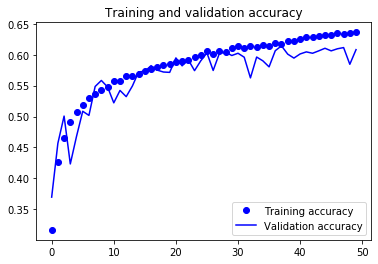

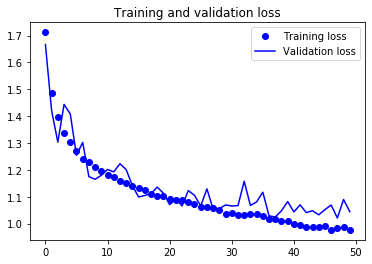

In [0]:
accuracy = niquin_train.history['acc']
val_accuracy = niquin_train.history['val_acc']
loss = niquin_train.history['loss']
val_loss = niquin_train.history['val_loss']
epochs = range(len(accuracy))
plt.plot(epochs, accuracy, 'bo', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [0]:
niquin_model.save("niquin_model.h5py")

NameError: ignored